# ABOUT:
- this notebook:
    - compares the performances of different Transformer encoders
    - compare the use of different features as input to final sentiment classifier

# FINDINGS:
1. using cls and aspect embeddings as input feature to sentiment classifier works best 
2. domain adapted model improves performance significantly
3. adding aspect embeddings as second sentence does not improve performance 

In [1]:
import os
import seaborn as sb
import pandas as pd
from utils import *
import matplotlib.pyplot as plt

In [2]:
log_folder = r"C:\Users\tanch\Documents\NTU\URECA - Aspect Based Sentiment Analysis\URECA--Financial-Aspect-Based-Sentiment-Analysis\logs\text_files"
df = get_all_results(log_folder)

In [3]:
def filter_results(temp_df, data_name = [], encoder_name = [], feature_type2 = [], mode = []):
    if data_name:
        assert len(set(data_name) - set(temp_df.data_name.unique()))==0
    if feature_type2:
        assert len(set(feature_type2) - set(temp_df.feature_type2.unique()))==0
    if encoder_name :
        assert len(set(encoder_name) - set(temp_df.encoder_name.unique()))==0
    if mode:
        assert len(set(mode) - set(temp_df['mode'].unique()))==0
    data_name_filter = temp_df['data_name'].isin(data_name) 
    encoder_name_filter = temp_df['encoder_name'].isin(encoder_name) 
    feature_type2_filter = temp_df['feature_type2'].isin(feature_type2) 
    mode_filter = temp_df['mode'].isin(mode) 
    return temp_df[data_name_filter & encoder_name_filter & feature_type2_filter & mode_filter]

# Compare transformer encoders

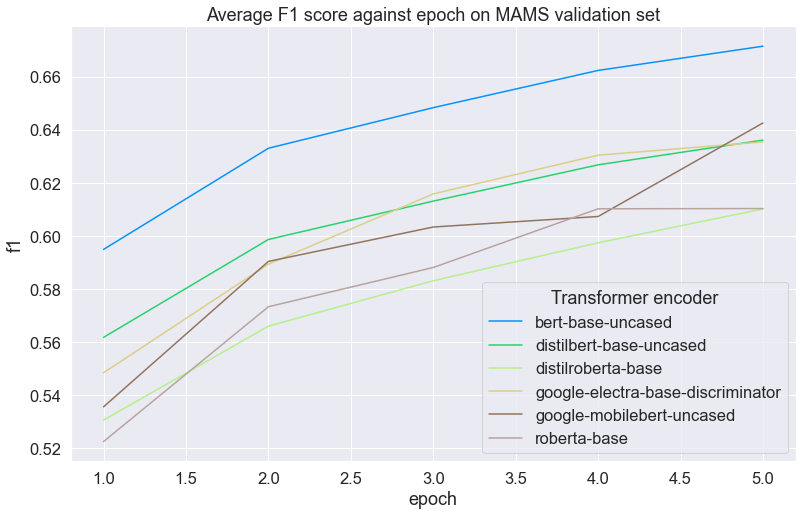

In [4]:
sb.set(rc = {'figure.figsize':(13,8)},font_scale = 1.5) 
data_name = "MAMS"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = list(df.encoder_name.unique()),
                           feature_type2 = ['mean'],
                           mode = ["validation"]).groupby(["epoch","encoder_name"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "encoder_name", palette = "terrain").set(title = f"Average F1 score against epoch on {data_name} validation set")
plt.legend(title='Transformer encoder')

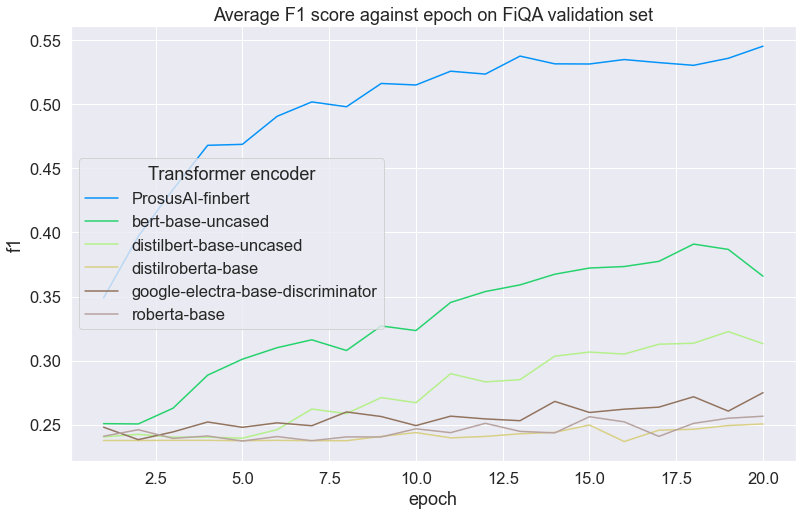

In [67]:
data_name = "FiQA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = list(df.encoder_name.unique()),
                           feature_type2 = ['mean'],
                           mode = ["validation"]).groupby(["epoch","encoder_name"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "encoder_name", palette = "terrain").set(title = f"Average F1 score against epoch on {data_name} validation set")
plt.legend(title='Transformer encoder')

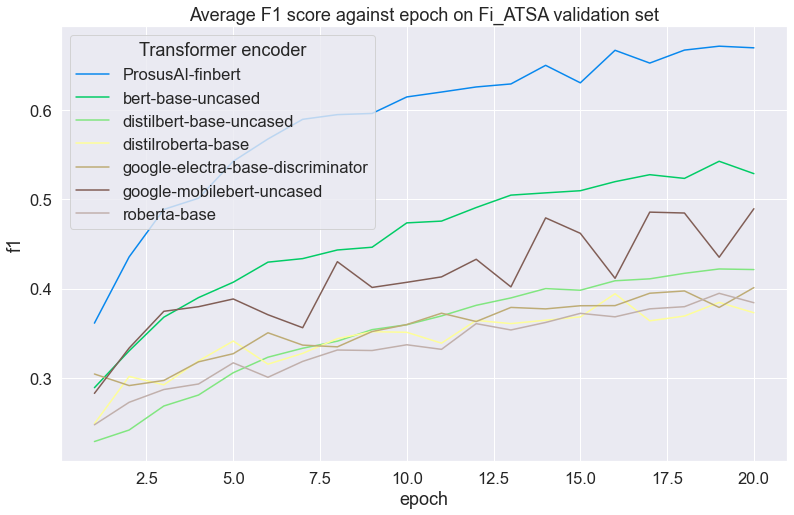

In [65]:
data_name = "Fi_ATSA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = list(df.encoder_name.unique()),
                           feature_type2 = ['mean'],
                           mode = ["validation"]).groupby(["epoch","encoder_name"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "encoder_name", palette = "terrain").set(title = f"Average F1 score against epoch on {data_name} validation set")
plt.legend(title='Transformer encoder')

# Compare feature_type

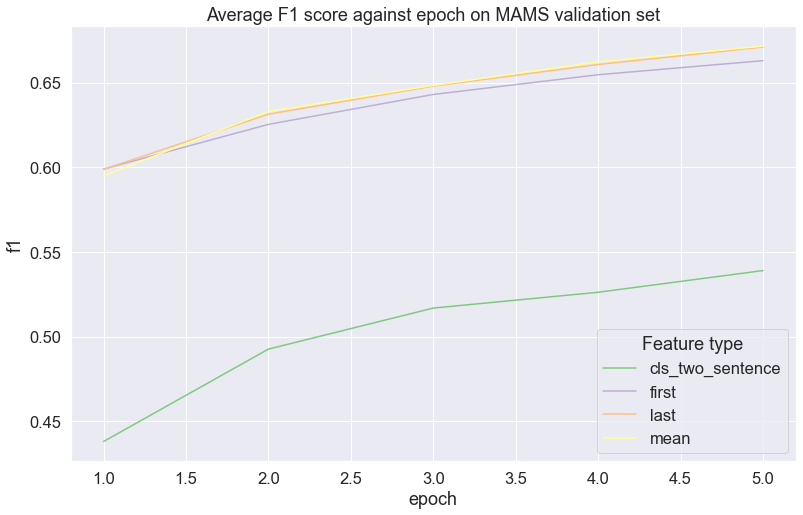

In [64]:
data_name = "MAMS"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean', 'cls_two_sentence'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(title = f"Average F1 score against epoch on {data_name} validation set")
plt.legend(title='Feature type')


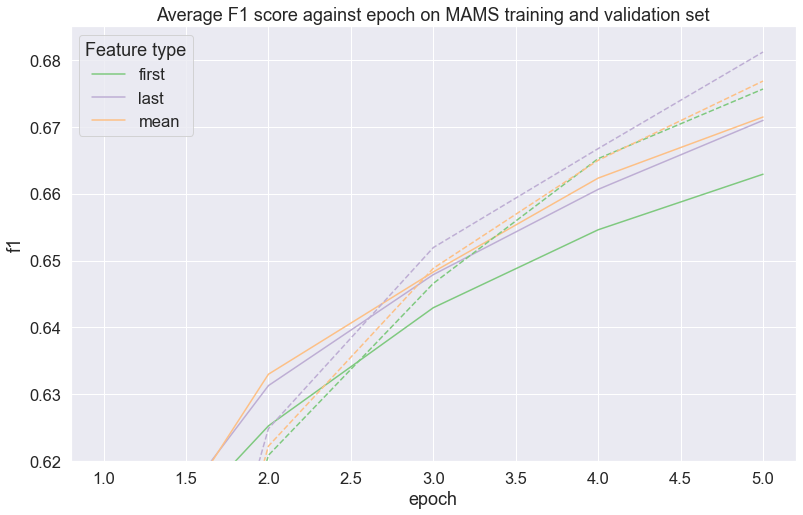

In [63]:
data_name = "MAMS"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.62,0.685))
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean'],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.62,0.685), title = f"Average F1 score against epoch on {data_name} training and validation set")
plt.legend(title='Feature type', labels= ["first","last","mean"])

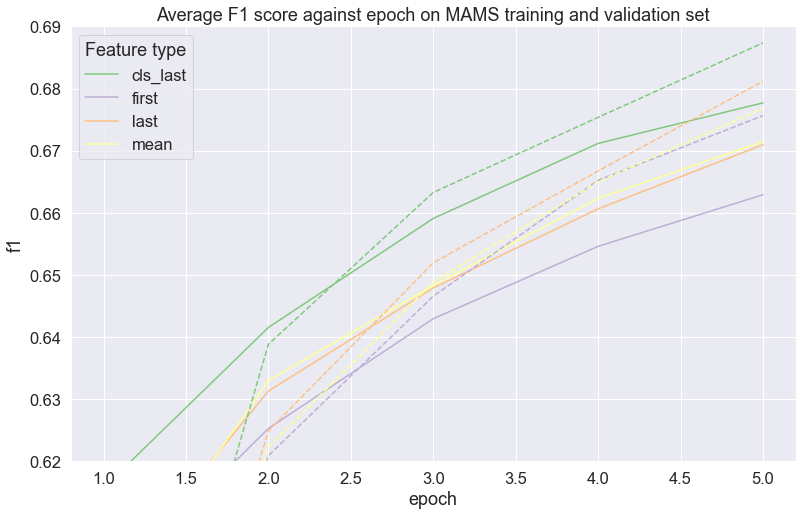

In [87]:
data_name = "MAMS"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean',"cls_last"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.62,0.69))
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean',"cls_last"],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.62,0.69), title = f"Average F1 score against epoch on {data_name} training and validation set")
plt.legend(title='Feature type', labels= ["cls_last", "first","last","mean"])

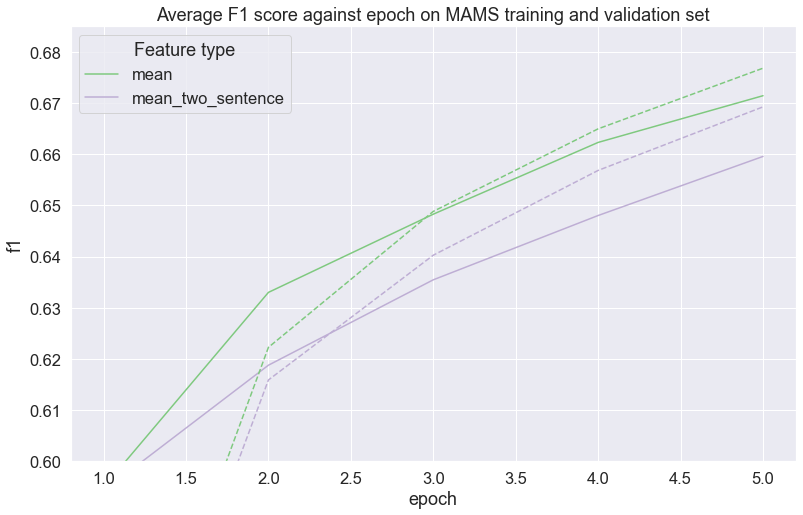

In [68]:
data_name = "MAMS"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['mean','mean_two_sentence'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.6,0.685), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['mean','mean_two_sentence'],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.6,0.685))
plt.legend(title='Feature type', labels= ["mean","mean_two_sentence"])

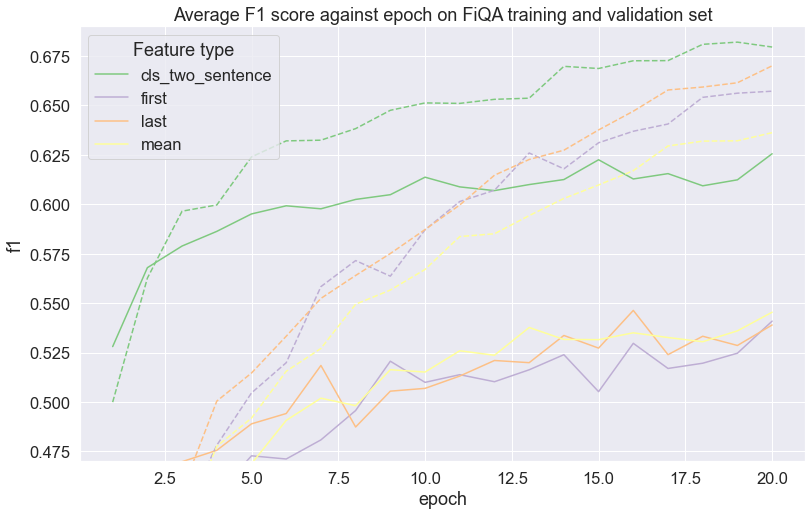

In [72]:
data_name = "FiQA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.47,0.69), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.47,0.69))
plt.legend(title='Feature type', labels= ["cls_two_sentence","first","last","mean"])

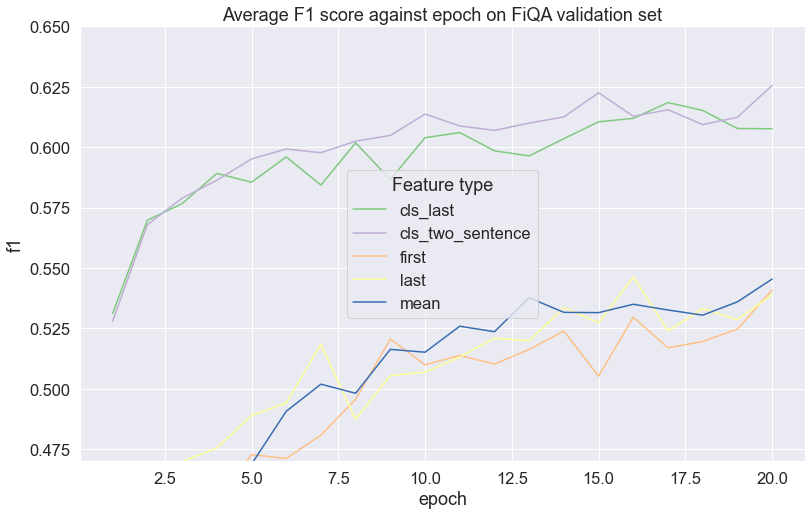

In [98]:
data_name = "FiQA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence","cls_last"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.47,0.65), title = f"Average F1 score against epoch on {data_name} validation set")
# temp_df = filter_results(df, data_name = [data_name], 
#                            encoder_name = ['ProsusAI-finbert'],
#                            feature_type2 = ['first', 'last', 'mean', "cls_two_sentence","cls_last"],
#                            mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
# sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.47,0.765))
plt.legend(title='Feature type', labels= ["cls_last", "cls_two_sentence","first","last","mean"])

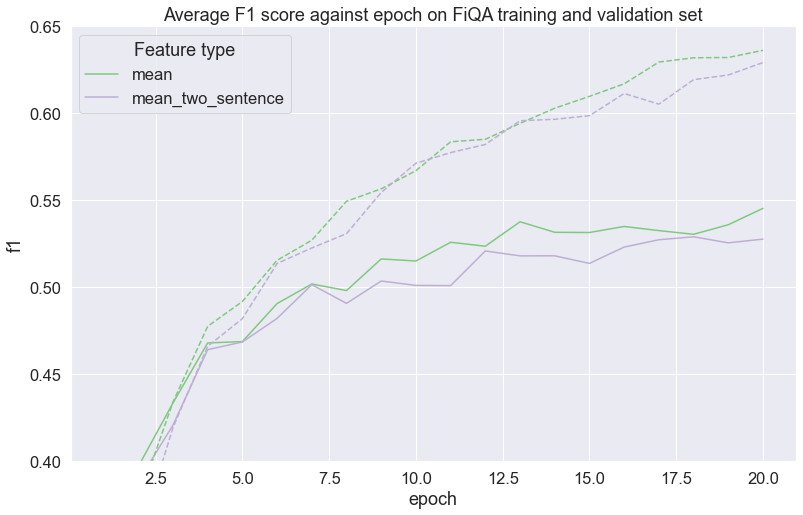

In [99]:
data_name = "FiQA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['mean', 'mean_two_sentence'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.4,0.65), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['mean', 'mean_two_sentence'],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.4,0.65))
plt.legend(title='Feature type', labels= ["mean","mean_two_sentence"])

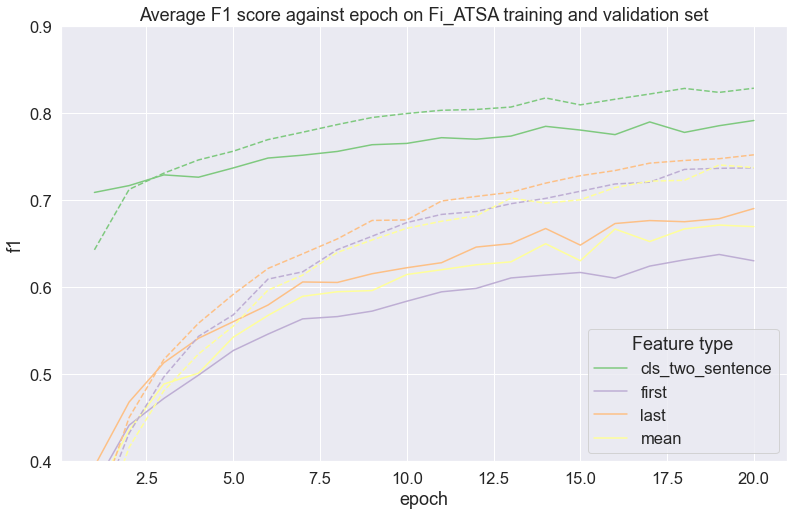

In [81]:
data_name = "Fi_ATSA"

temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.4,0.9), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.4,0.9))

plt.legend(title='Feature type', labels= ["cls_two_sentence","first","last","mean"])

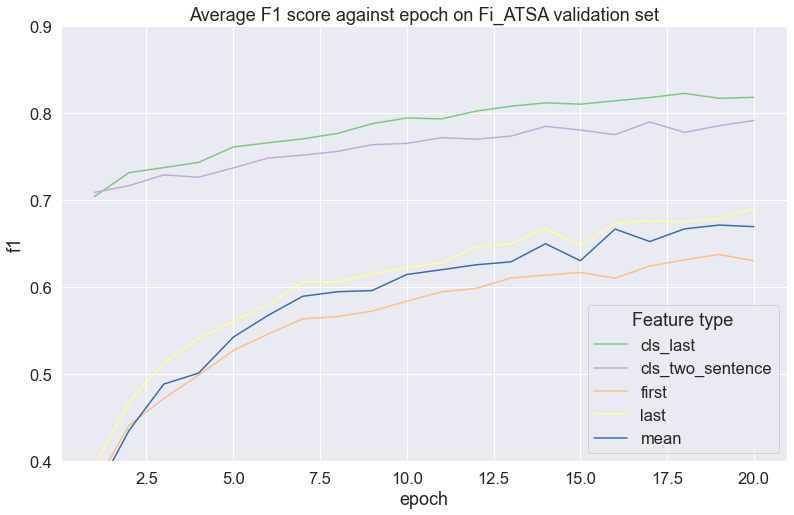

In [103]:
data_name = "Fi_ATSA"

temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence","cls_last"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.4,0.9), title = f"Average F1 score against epoch on {data_name} validation set")
# temp_df = filter_results(df, data_name = [data_name], 
#                            encoder_name = ['ProsusAI-finbert'],
#                            feature_type2 = ['first', 'last', 'mean', "cls_two_sentence","cls_last"],
#                            mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
# sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.4,0.9))

plt.legend(title='Feature type', labels= ["cls_last","cls_two_sentence","first","last","mean"])

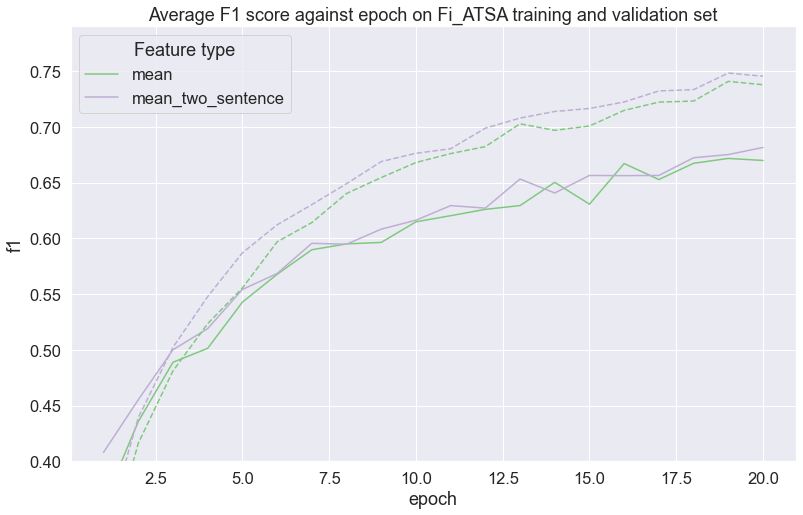

In [51]:
data_name = "Fi_ATSA"

temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['mean', 'mean_two_sentence'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.4,0.79), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['mean', 'mean_two_sentence'],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.4,0.79))

plt.legend(title='Feature type', labels= ["mean","mean_two_sentence"])

[(0.4, 0.79),
 Text(0.5, 1.0, 'Average F1 score against epoch on Fi_ATSA training and validation set')]

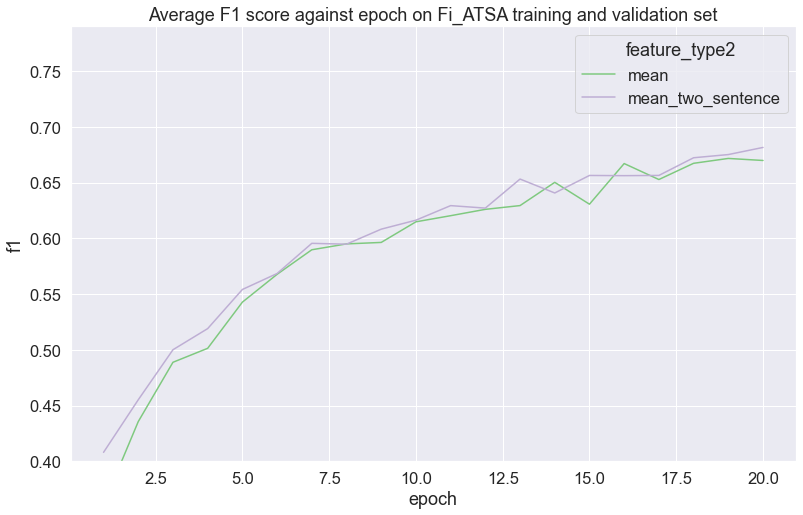

In [52]:
data_name = "Fi_ATSA"

temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ['mean', 'mean_two_sentence'],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.4,0.79), title = f"Average F1 score against epoch on {data_name} training and validation set")

Text(0, 0.5, 'F1 score')

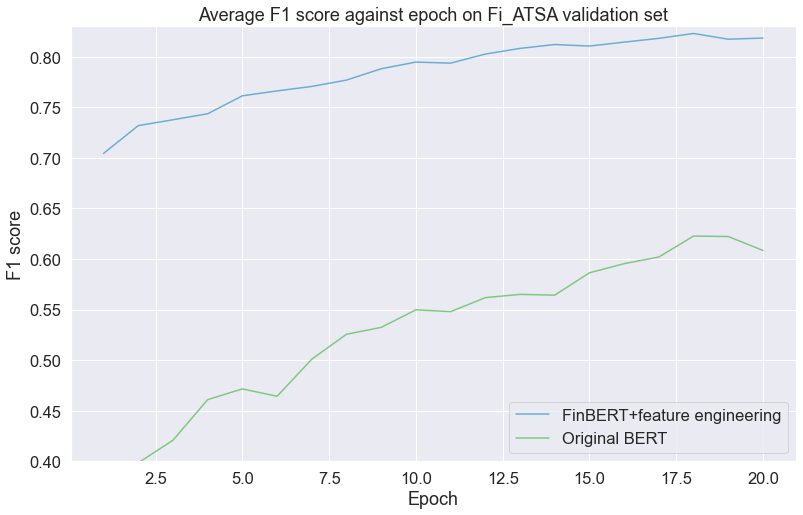

In [6]:
data_name = "Fi_ATSA"

temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['ProsusAI-finbert'],
                           feature_type2 = ["cls_last"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Blues", legend = None).set(ylim = (0.40,0.83), title = f"Average F1 score against epoch on {data_name} validation set")
data_name = "Fi_ATSA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ["cls_two_sentence"],
                           mode = ["validation"]).groupby(["epoch","encoder_name"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "encoder_name", palette = "Accent", legend = None).set(ylim = (0.40,0.83), title = f"Average F1 score against epoch on {data_name} validation set")
plt.legend(labels= ["FinBERT+feature engineering","Original BERT"])
plt.xlabel("Epoch")
plt.ylabel("F1 score")


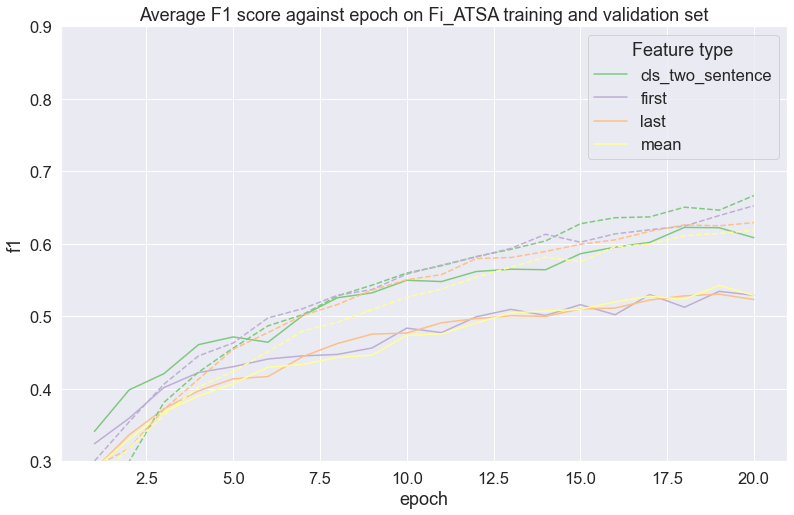

In [69]:
data_name = "Fi_ATSA"
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["validation"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent").set(ylim = (0.30,0.90), title = f"Average F1 score against epoch on {data_name} training and validation set")
temp_df = filter_results(df, data_name = [data_name], 
                           encoder_name = ['bert-base-uncased'],
                           feature_type2 = ['first', 'last', 'mean', "cls_two_sentence"],
                           mode = ["train"]).groupby(["epoch","feature_type2"]).mean()
sb.lineplot(data = temp_df, x = "epoch" , y = "f1", hue = "feature_type2", palette = "Accent", linestyle="dashed").set(ylim = (0.30,0.90))
plt.legend(title='Feature type', labels= ["cls_two_sentence","first","last","mean"])

# FINDINGS:
1. using cls and aspect embeddings as input feature to sentiment classifier works best 
2. domain adapted model improves performance significantly
3. adding aspect embeddings as second sentence does not improve performance 